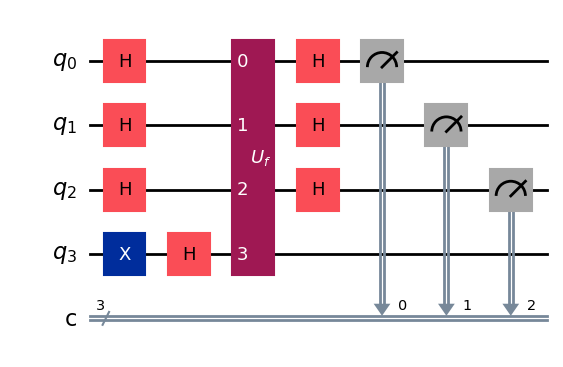

In [1]:
from quantum.algorithms import DeutschJozsa
from quantum.oracles import AutoOracle

def f_1(x):
    if x == 0:
        return 0
    else:
        return 1
    
def f_2(x):
    if x == 0 or x == 2:
        return 0
    else:
        return 1
    
def f_3(x):
    if x == 0 or x==3 or x == 6 or x == 7:
        return 1
    else:
        return 0

n = 3
oracle = AutoOracle(f_3, n, 1)
algorithm = DeutschJozsa(oracle.gate, n)
qc = algorithm.build_circuit()
qc.draw(output="mpl")

In [5]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()
result = algorithm.run(simulator, num_shots=10)
result.name

'Balanced'